**Welcome everyone!**

In this short Collab notebook, I will provide a basic interface for interacting with your data in Python. This includes loading, printing summary statistics and visualizing it as a Figure. I would highly recommend you try this doing this on your own dataset as well (or using my example site here).

In [ ]:
#### Imports

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib import cm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#### Download site data

# Note: if gdown is not working, please manually download the file and extract it to you Google Drive
# It's a large file (approx. 340 MB) so it may take a minute..
# https://drive.google.com/file/d/10JhKjU7qEwA3L2ltGDDWBU5ND6rOTfVE/view?usp=sharing


!gdown --id '10JhKjU7qEwA3L2ltGDDWBU5ND6rOTfVE'
!unzip '/content/site1.csv.zip' -d '/content'
site_loc = "/content/drive/My Drive/nrcan-ml/data/site1.csv" # Change this to point to site1 on your google drive



Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=10JhKjU7qEwA3L2ltGDDWBU5ND6rOTfVE 

unzip:  cannot find or open /content/site1.csv.zip, /content/site1.csv.zip.zip or /content/site1.csv.zip.ZIP.


In [ ]:
#### Settings and Constants

plt.rcParams.update({'font.size': 30})
BAND_NAMES = ['ndwi', 'ndvi', 'ndsi', 'swir', 'moisture_index', 'true_color']
IMG_TITLES = ['NDWI (B3-B8)/(B3+B8)', 'NDVI (B8-B4)/(B8+B4)', 'NDSI (B3-B11)/(B3+B11)', 'SWIR (B12,8A,B4)', 'Moisture (B8A-B11)/(B8A+B11)', 'True Color (B2,B3,B4)']
LAND_COVER_TYPES = ['Forest', 'Shrubland', 'Wetland', 'Cropland', 'Barren', 'Urban', 'Water']
WIDTH = 2500
HEIGHT = 2181
SAMPLE_SIZE = 10000


For this example, I've downloaded NRCan and S2 data from two Canadian sites (shown below): 

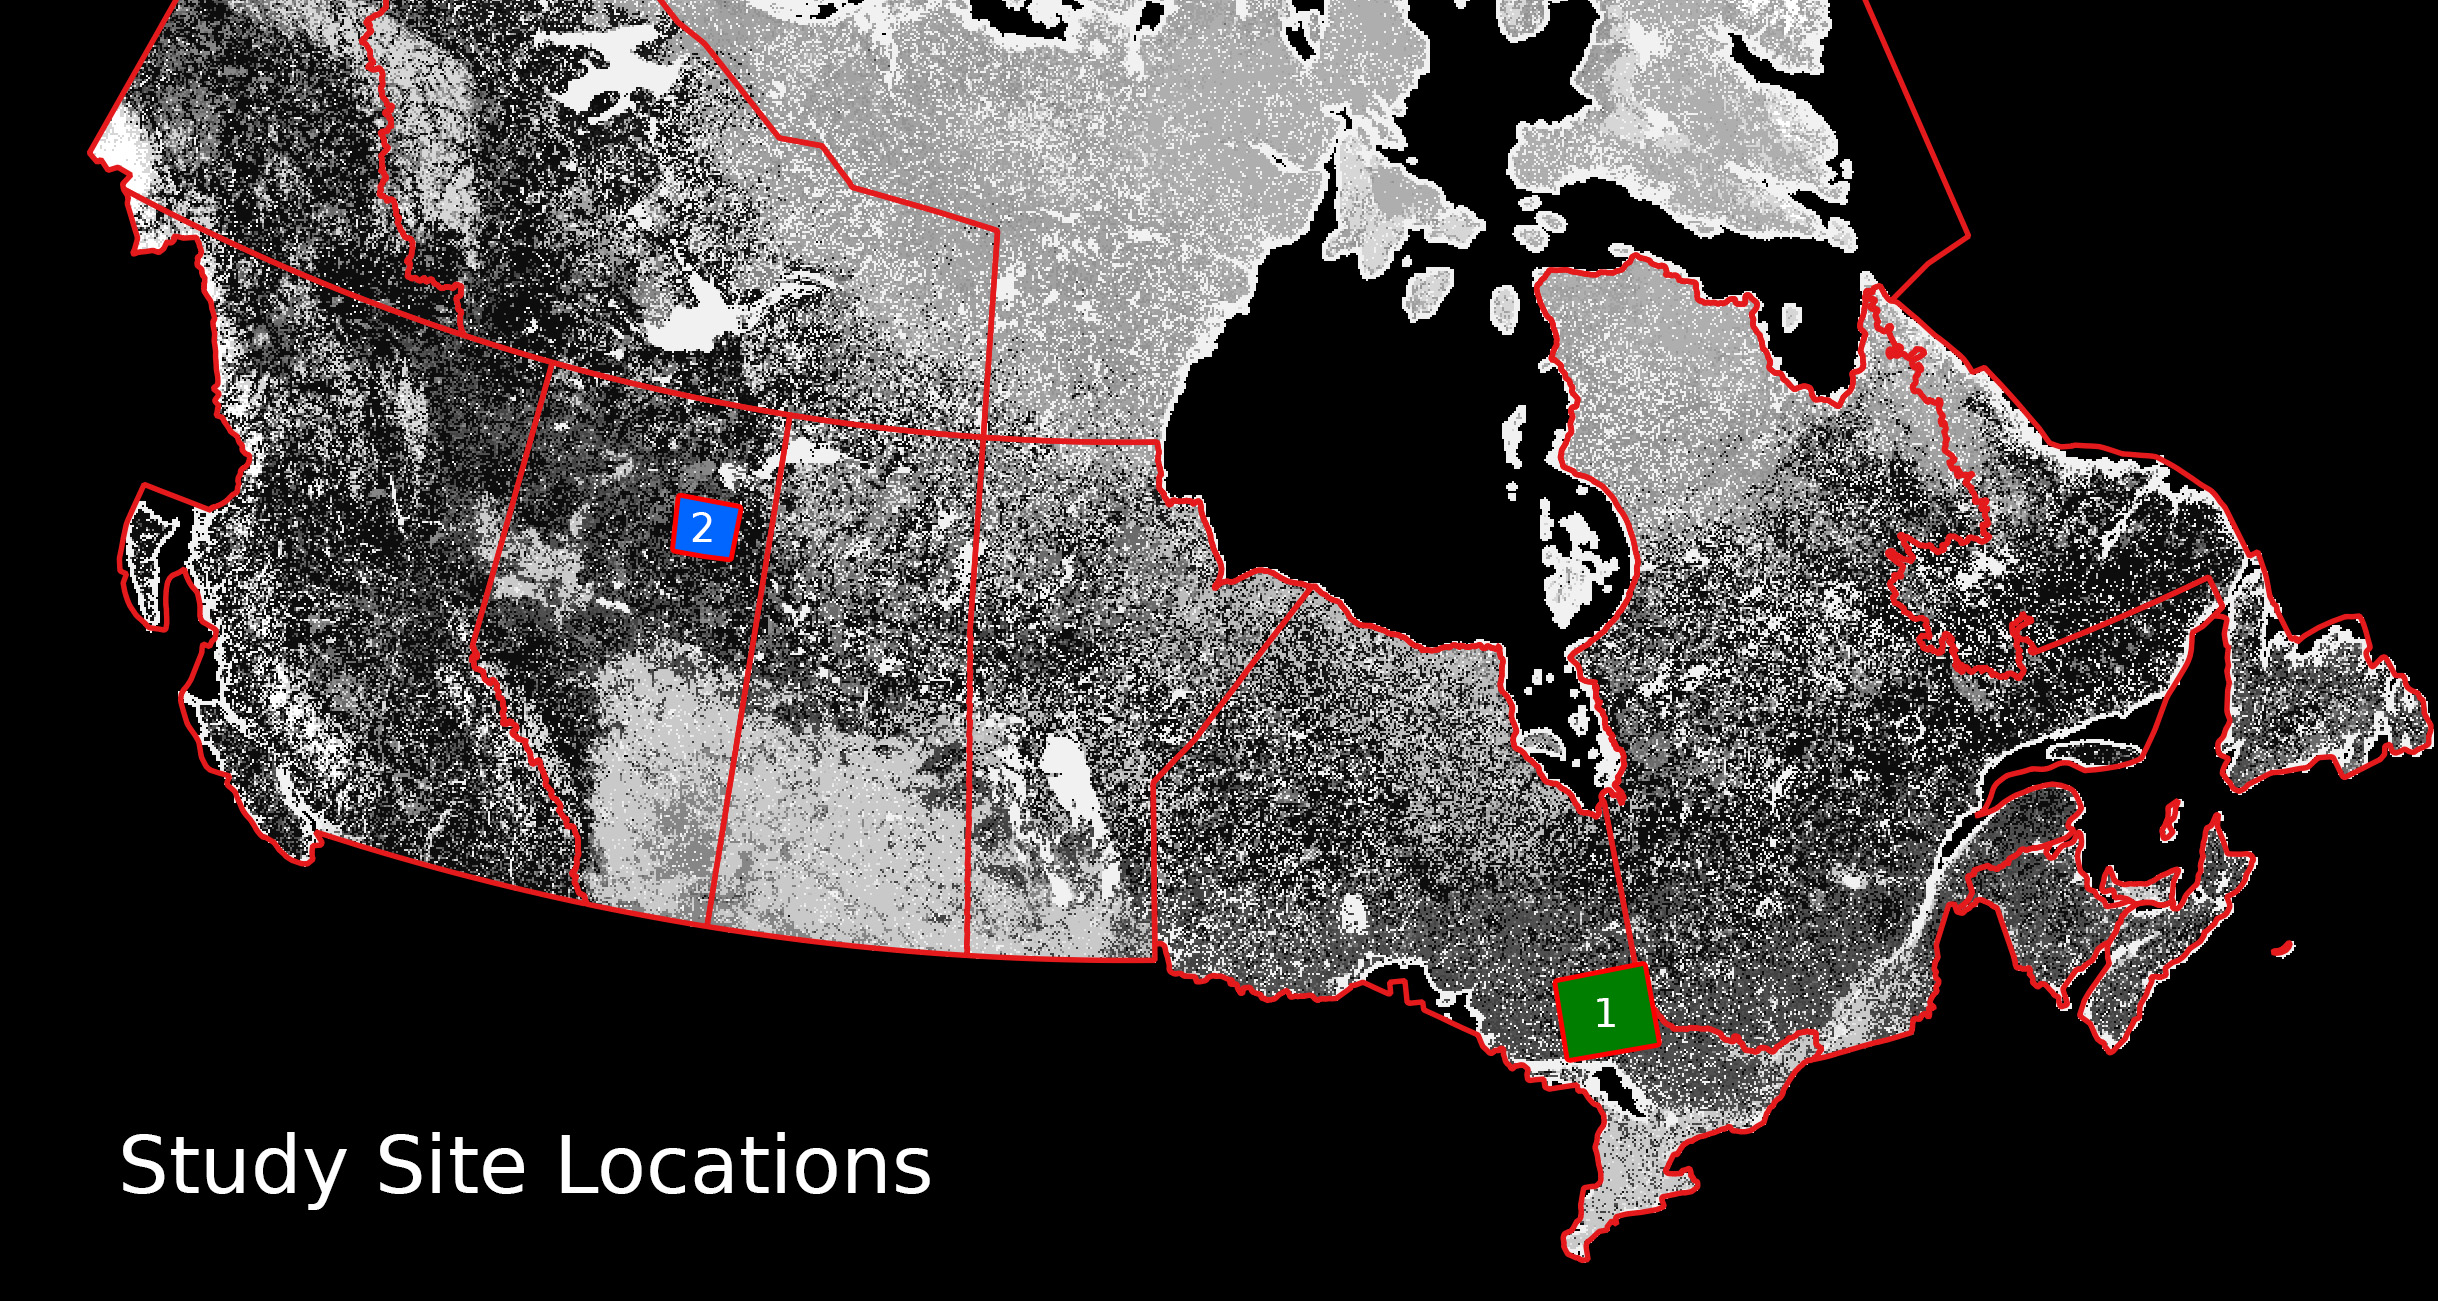

In [ ]:
#### Study Site Locations

Image('https://i.imgur.com/Ie3gvq4.jpg') 

It's always a good idea to start by taking a look at the data you are working with. Since we are only working with a small subset of data, I am going to load everything into Pandas and print out some general statistics:

In [ ]:
#### Dataset Structure

df = pd.read_csv(site_loc)  
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452500 entries, 0 to 5452499
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   b01                 float64
 2   b06                 float64
 3   b07                 float64
 4   b11                 float64
 5   b04                 float64
 6   b12                 float64
 7   b8a                 float64
 8   ndwi                float64
 9   ndwi_1              float64
 10  ndwi_1_2            float64
 11  b08                 float64
 12  b09                 float64
 13  ndsi                float64
 14  ndsi_1              float64
 15  ndsi_1_2            float64
 16  moisture_index      float64
 17  moisture_index_1    float64
 18  moisture_index_1_2  float64
 19  b05                 float64
 20  ndvi                float64
 21  ndvi_1              float64
 22  ndvi_1_2            float64
 23  swir                float64
 24  swir_1              floa

,Unnamed: 0,b01,b06,b07,b11,b04,b12,b8a,ndwi,ndwi_1,...,ndvi_1_2,swir,swir_1,swir_1_2,land_cover,b02,true_color,true_color_1,true_color_1_2,b03
0,0,0.0274,0.2010,0.2261,0.1278,0.0385,0.0667,0.2522,0.367163,0.684822,...,0.00,0.16675,0.63050,0.09625,2.0,0.0319,0.09625,0.13400,0.07975,0.0536
1,1,0.0267,0.1815,0.2062,0.1152,0.0301,0.0571,0.2292,0.346457,0.674510,...,0.00,0.14275,0.57300,0.07525,0.0,0.0270,0.07525,0.11475,0.06750,0.0459
2,2,0.0259,0.1905,0.2182,0.1199,0.0357,0.0600,0.2442,0.337617,0.670107,...,0.00,0.15000,0.61050,0.08925,2.0,0.0287,0.08925,0.11975,0.07175,0.0479
3,3,0.0273,0.2068,0.2386,0.1299,0.0433,0.0663,0.2691,0.335075,0.668841,...,0.00,0.16575,0.67275,0.10825,2.0,0.0304,0.10825,0.12850,0.07600,0.0514
4,4,0.0249,0.1653,0.1880,0.0956,0.0240,0.0455,0.2056,0.345806,0.674186,...,0.00,0.11375,0.51400,0.06000,2.0,0.0253,0.06000,0.10400,0.06325,0.0416
5,5,0.0261,0.1698,0.1923,0.1041,0.0266,0.0502,0.2114,0.348592,0.675573,...,0.00,0.12550,0.52850,0.06650,2.0,0.0255,0.06650,0.10575,0.06375,0.0423
6,6,0.0251,0.1582,0.1833,0.1048,0.0302,0.0527,0.2067,0.343416,0.672996,...,0.00,0.13175,0.51675,0.07550,2.0,0.0244,0.07550,0.09900,0.06100,0.0396
7,7,0.0250,0.1887,0.2168,0.1444,0.0385,0.0758,0.2496,0.333333,0.667974,...,0.00,0.18950,0.62400,0.09625,0.0,0.0293,0.09625,0.11750,0.07325,0.0470
8,8,0.0223,0.0710,0.0801,0.0668,0.0235,0.0380,0.0889,0.472727,0.737398,...,0.04,0.09500,0.22225,0.05875,2.0,0.0186,0.05875,0.06250,0.04650,0.0250
9,9,0.0202,0.0610,0.0686,0.0398,0.0175,0.0198,0.0754,0.333952,0.668282,...,0.00,0.04950,0.18850,0.04375,6.0,0.0155,0.04375,0.05050,0.03875,0.0202


Let's take a look at some of the spectral band details in S2:

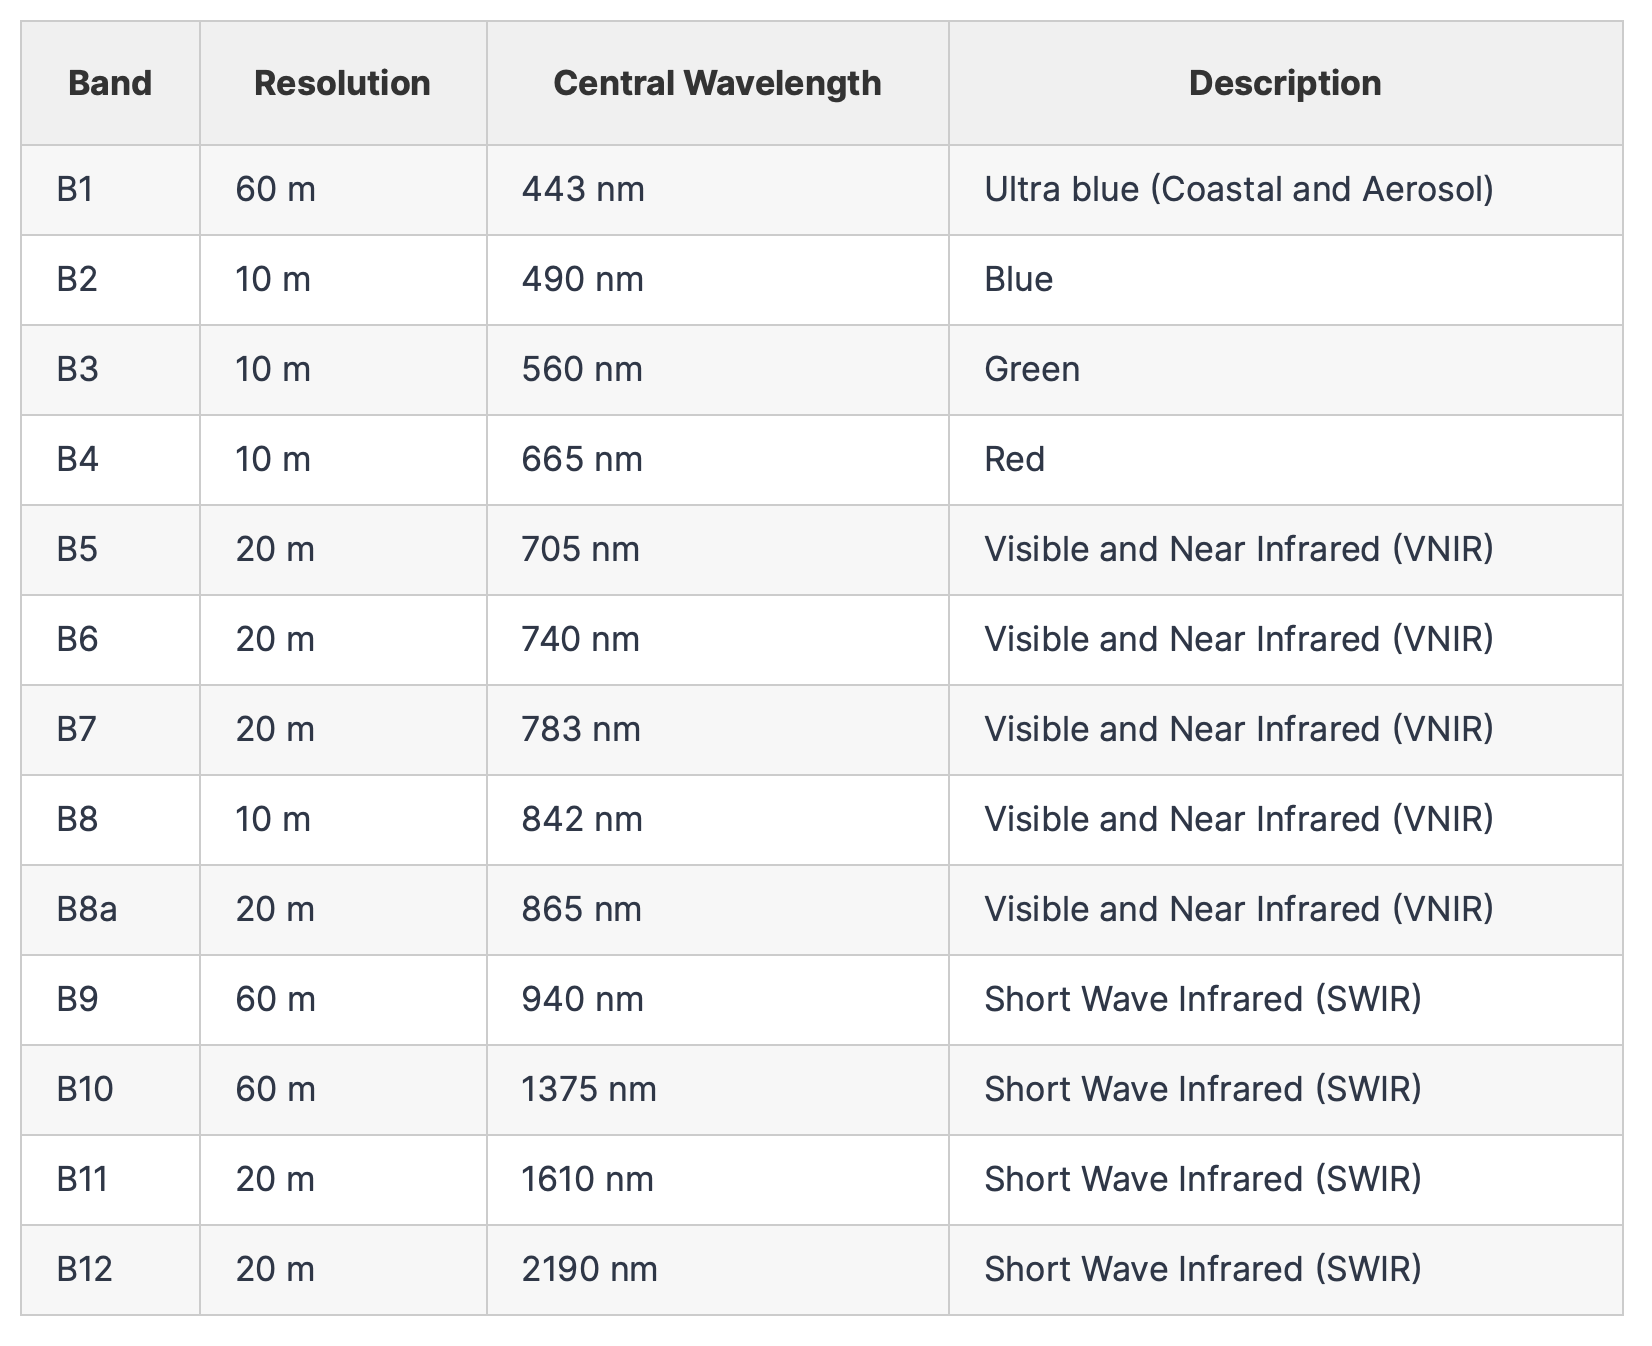

In [ ]:
#### S2 Spectral Bands

Image('https://i.imgur.com/eZlQkeu.png') 

Finally, let's take a peek at what the spectral bands look like, along with a summary of the corresponding NRCan-classified land cover types which would be our reference data for this project:

In [ ]:
#### Example plotting functions to display S2 data in Python

def show_band_matrix():
    fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(50,25))
    plt.suptitle("Sentinel-2 Bands", fontsize=60)
    band_count = 1
    for i,ax_row in enumerate(axes):
        for j, ax_col in enumerate(ax_row):
            if i == 0: # Multichannel bands
                title = IMG_TITLES[j]
                imband = np.asarray([np.asarray(df[BAND_NAMES[j]]).reshape( \
                         WIDTH, HEIGHT), np.asarray(df[BAND_NAMES[j]+'_1']).reshape(WIDTH, \
                         HEIGHT), np.asarray(df[BAND_NAMES[j]+'_1_2']).reshape(WIDTH, HEIGHT)]).T
            elif i == 2 and j == 3: # Special case for 8a band
                title = 'b8a'
                imband = np.asarray(df[title]).reshape(WIDTH, HEIGHT).T
                band_count += 1
            else: # Individual bands
                title = 'b' + str(band_count).zfill(2)
                imband = np.asarray(df[title]).reshape(WIDTH, HEIGHT).T
                band_count += 1
            
            axes[i][j].set_title(title)
            axes[i][j].imshow(imband, aspect='auto')
            axes[i][j].set_axis_off()

def show_land_cover():
    fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(40,15))
    ax.set_title("NRCan - 2015 Land Cover of Canada")
    cmap = cm.get_cmap('jet', 7)    # 11 discrete colors
    im = ax.imshow(np.asarray(df.land_cover).reshape(WIDTH, HEIGHT).T, cmap=cmap, aspect='auto')
    ax.set_axis_off()
    cbar = plt.colorbar(im, ax=ax)
    tick_locs = (np.arange(7) + 0.5)*(7-1)/7
    cbar.set_ticks(tick_locs)
    cbar.set_ticklabels(LAND_COVER_TYPES)
    
    ax2.grid(linestyle='--')
    dp = sns.distplot(df.land_cover, hist=False, kde_kws=dict(linewidth=8))
    ax2.set_xticks(np.arange(7))
    ax2.set_xticklabels(LAND_COVER_TYPES, fontsize=20)
    l1 = ax2.lines[0]
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    ax2.fill_between(x1,y1, color="#5471ab", alpha=0.3)
    ax2.set_xlabel("Land Cover Type")
    ax2.set_title("Land Cover Density")

show_band_matrix()
show_land_cover()



Output hidden; open in https://colab.research.google.com to view.

That's all for now, we will be building on this code later on when we construct our first classifier, so I'd recommend making a copy of this notebook to work with on your own!
